<a href="https://colab.research.google.com/github/Hemondj/Projects/blob/main/JamesHemondProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
infile="/content/311_Service_Requests_20240220.csv"

temp=pd.read_csv(infile,nrows=5)

In [3]:
temp.columns

Index(['Case Reference', 'Open Date', 'Closed Date', 'Status', 'Subject',
       'Reason', 'Type', 'Object Type', 'Address Number', 'Address Line 1',
       'Address Line 2', 'City', 'State', 'Zipcode', 'Property ID', 'Location',
       'Latitude', 'Longitude', 'Council District', 'Council District 2011',
       'Police District', 'Census Tract', 'Census Block Group', 'Census Block',
       'Neighborhood', 'X Coordinate', 'Y Coordinate', '2010 Census Tract',
       '2010 Census Block Group', '2010 Census Block', 'TRACTCE20',
       'GEOID20_tract', 'GEOID20_blockgroup', 'GEOID20_block'],
      dtype='object')

In [5]:
temp.head()

,Case Reference,Open Date,Closed Date,Status,Subject,Reason,Type,Object Type,Address Number,Address Line 1,...,Neighborhood,X Coordinate,Y Coordinate,2010 Census Tract,2010 Census Block Group,2010 Census Block,TRACTCE20,GEOID20_tract,GEOID20_blockgroup,GEOID20_block
0,1001988123,02/13/2024 10:38:00 AM,02/14/2024 02:49:00 PM,Closed,Dept of Public Works,Engineering - Street Repairs,Pot Hole (Req_Serv),Property,INTERSECTION,Bailey Ave,...,Seneca Babcock,1084856.800,1.046538e+06,163.00,2,2005,16300,36029016300,360290163002,360290163002005
1,1001988270,02/13/2024 03:19:00 PM,02/14/2024 01:05:00 PM,Closed,Dept of Public Works,Rodent_Pest Control,Rodents (Req_Serv),Property,290,SUMNER,...,Genesee-Moselle,-8773293.127,5.298197e+06,29.00,1,1000,2900,36029002900,360290029001,360290029001000
2,1001988178,02/13/2024 12:15:00 PM,02/14/2024 01:04:00 PM,Closed,Dept of Public Works,Sanitation,Totes Replace (Req_Serv),Property,32,VIRGINIA PL,...,Allentown,-8780194.135,5.296420e+06,68.00,2,2003,6801,36029006801,360290068011,360290068011003
3,1001988102,02/13/2024 10:06:00 AM,02/13/2024 12:54:00 PM,Closed,Dept of Parking,Parking Violations Bureau,Parking Issues (Req_Serv),Property,737,FERRY WEST,...,Elmwood Bryant,-8780109.316,5.299030e+06,66.02,1,1000,6602,36029006602,360290066021,360290066021001
4,1001988088,02/13/2024 09:54:00 AM,02/13/2024 02:17:00 PM,Closed,Dept of Public Works,Sanitation,Trash Ordinance Violation (Req_Serv),Property,159,IDEAL,...,Lovejoy,-8772767.978,5.295122e+06,23.00,2,2002,2300,36029002300,360290023002,360290023002002


In [15]:
from datetime import date

dtypes = {
  'Case Reference':str,
  'Open Date':str,
  'Closed Date':str,
  'Status':str,
  'Subject':str,
  'Reason':str,
  'Type':str,
  'Object Type':str,
  'Address Number':str,
  'Address Line 1':str,
  'Address Line 2':str,
  'City':str,
  'State':str,
  'Zipcode':str,
  'Property ID':str,
  'Location':str,
  'Latitude':str,
  'Longitude':str,
  'Council District':str,
  'Council District 2011':str,
  'Police District':str,
  'Census Tract':str,
  'Census Block Group':str,
  'Census Block':str,
  'Neighborhood':str,
  'X Coordinate':str,
  'Y Coordinate':str,
  '2010 Census Tract':str,
  '2010 Census Block Group':str,
  '2010 Census Block':str,
  'TRACTCE20':str,
  'GEOID20_tract':str,
  'GEOID20_blockgroup':str,
  'GEOID20_block':str,
}

infile2="/content/311_Service_Requests_20240220.csv"

buff_data = pd.read_csv(infile2, dtype=dtypes, usecols=dtypes.keys(), parse_dates=['Open Date', 'Closed Date'])

buff_dd = dd.from_pandas(buff_data, npartitions=10)


In [19]:
columns_to_keep = ['Open Date', 'Closed Date', 'Status', 'Subject', 'Reason', 'Type', 'Object Type', 'Council District', 'Police District', 'Neighborhood']

buff_dd = buff_dd[columns_to_keep]


In [32]:
buff_dd.head()

,Open Date,Closed Date,Status,Subject,Reason,Type,Object Type,Council District,Police District,Neighborhood
0,2024-02-13 10:38:00,2024-02-14 14:49:00,Closed,Dept of Public Works,Engineering - Street Repairs,Pot Hole (Req_Serv),Property,FILLMORE,District A,Seneca Babcock
1,2024-02-13 15:19:00,2024-02-14 13:05:00,Closed,Dept of Public Works,Rodent_Pest Control,Rodents (Req_Serv),Property,LOVEJOY,District C,Genesee-Moselle
2,2024-02-13 12:15:00,2024-02-14 13:04:00,Closed,Dept of Public Works,Sanitation,Totes Replace (Req_Serv),Property,FILLMORE,District B,Allentown
3,2024-02-13 10:06:00,2024-02-13 12:54:00,Closed,Dept of Parking,Parking Violations Bureau,Parking Issues (Req_Serv),Property,ELLICOTT,District B,Elmwood Bryant
4,2024-02-13 09:54:00,2024-02-13 14:17:00,Closed,Dept of Public Works,Sanitation,Trash Ordinance Violation (Req_Serv),Property,LOVEJOY,District C,Lovejoy


Here is the file imported and filtered for important columns.

In [29]:
CatVars = ['Status', 'Subject', 'Reason', 'Type', 'Object Type', 'Council District', 'Police District', 'Neighborhood']
DateVars = ['Open Date', 'Closed Date',]


Using these variable I can access counts of each sub type.

In [36]:
buff_dd[CatVars[0]].value_counts().compute()

Closed    1106968
Open         5489
Name: Status, dtype: int64

In [37]:
buff_dd[CatVars[1]].value_counts().compute()

Dept of Public Works                   705940
DPIS                                   189414
Dept of Parking                         62881
Utilities                               62306
Buffalo Police Department               54804
Office of the Mayor                     14057
Dept of Law                              7356
Office of Strategic Planning             6458
Buffalo Municipal Housing Authority      3198
Assessment & Taxation                    2514
Buffalo Fire Department                  1703
City Clerk                               1586
Community Services & Rec. Program.        159
Human Resources                            68
Knowledge Management                        5
Test                                        4
Management Information Systems              2
New Americans                               2
Name: Subject, dtype: int64

In [38]:
buff_dd[CatVars[2]].value_counts().compute()

Sanitation                                     347266
Housing                                        189414
Streets                                         97498
Engineering - Street Repairs                    96686
Parking Violations Bureau                       60619
Police                                          54804
Forestry                                        47761
Rodent Control                                  39144
National Grid                                   37838
Engineering - Traffic                           28283
Animal Shelter                                  23936
Rodent_Pest Control                             15505
Buffalo Sewer Authority                         15098
Buffalo Water Authority                          9370
Citizen Services - Quick Response Teams          6040
City Parks                                       5891
Real Estate                                      5396
Freedom of Information                           3752
Adjudication - Ordinance Vio

In [39]:
buff_dd[CatVars[3]].value_counts().compute()

Housing Violations (Req_Serv)               164654
Totes Replace (Req_Serv)                    127170
Garbage Missed Pick Up (Req_Serv)            52008
Pot Hole (Req_Serv)                          49151
Police Issue (Req_Serv)                      37999
                                             ...  
RalphWilson Park Construction (Req_Serv)         1
ReOpen Buffalo (Req_Serv)                        1
ADA-PW Sidewalks (Req_Serv)                      1
Security Deposit (Req_Serv)                      1
Thruway (Req_Serv)                               1
Name: Type, Length: 223, dtype: int64

In [40]:
buff_dd[CatVars[4]].value_counts().compute()

Property        1027281
Street            72534
Unknown            7335
Individual         5154
Organisation        153
Name: Object Type, dtype: int64

In [41]:
buff_dd[CatVars[5]].value_counts().compute()

UNKNOWN       919096
LOVEJOY        32578
FILLMORE       24352
MASTEN         23333
ELLICOTT       21125
NIAGARA        20302
UNIVERSITY     18225
DELAWARE       17936
SOUTH          17215
NORTH          16506
Name: Council District, dtype: int64

In [42]:
buff_dd[CatVars[6]].value_counts().compute()

District D    260661
District E    231110
District C    199250
District A    176431
District B    150068
UNKNOWN        94937
Name: Police District, dtype: int64

In [43]:
buff_dd[CatVars[7]].value_counts().compute()

UNKNOWN               93734
Broadway Fillmore     63518
North Park            54749
Kensington-Bailey     52297
South Park            48722
Elmwood Bidwell       47792
Genesee-Moselle       45459
Schiller Park         39925
Lovejoy               39694
University Heights    38070
Riverside             37888
Hopkins-Tifft         37558
Upper West Side       36741
Masten Park           34899
West Side             34291
Seneca-Cazenovia      30157
Elmwood Bryant        30047
Fillmore-Leroy        26768
Kenfield              26241
Parkside              25737
Delavan Grider        25305
Kaisertown            24106
Hamlin Park           22917
MLK Park              20438
Central Park          18992
Allentown             17511
Grant-Amherst         17425
Central               16916
Lower West Side       15961
Black Rock            15934
Seneca Babcock        15109
Fruit Belt            13361
West Hertel           12492
Pratt-Willert         11886
First Ward            10694
Ellicott            

I looks like status, Subject, object type, coucil district, and police district have reasonable number of variables.

The rest are not.

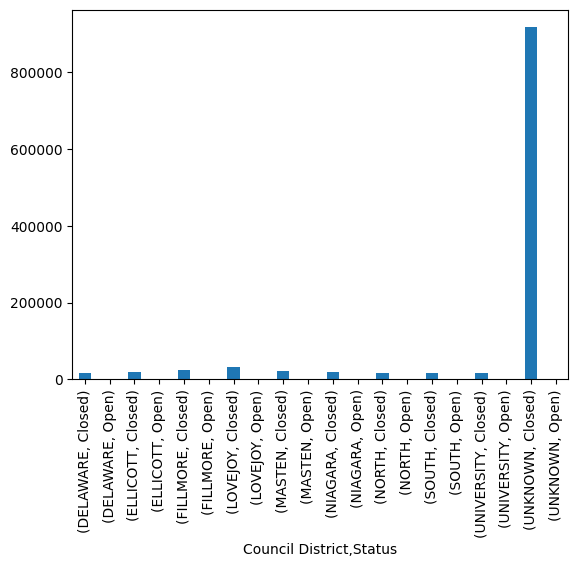

In [55]:

result = buff_dd.groupby(CatVars[5])
counts = result[CatVars[0]].value_counts().compute()

counts.plot(kind='bar')
plt.show()

Status vs Council District Plot

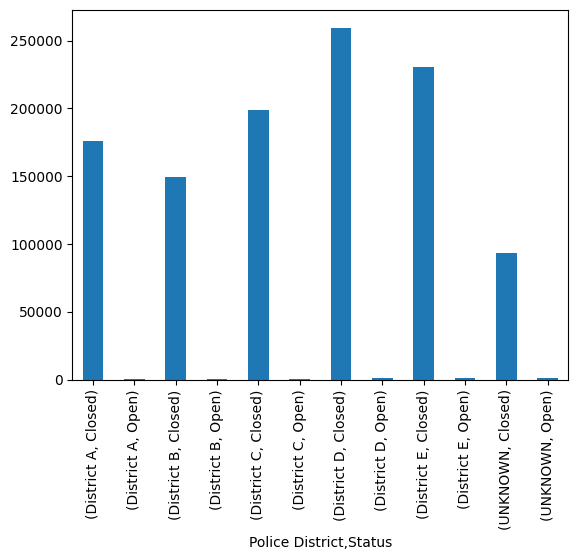

In [54]:
import matplotlib.pyplot as plt

result = buff_dd.groupby(CatVars[6])
counts = result[CatVars[0]].value_counts().compute()

counts.plot(kind='bar')
plt.show()

Status vs Police District Plot

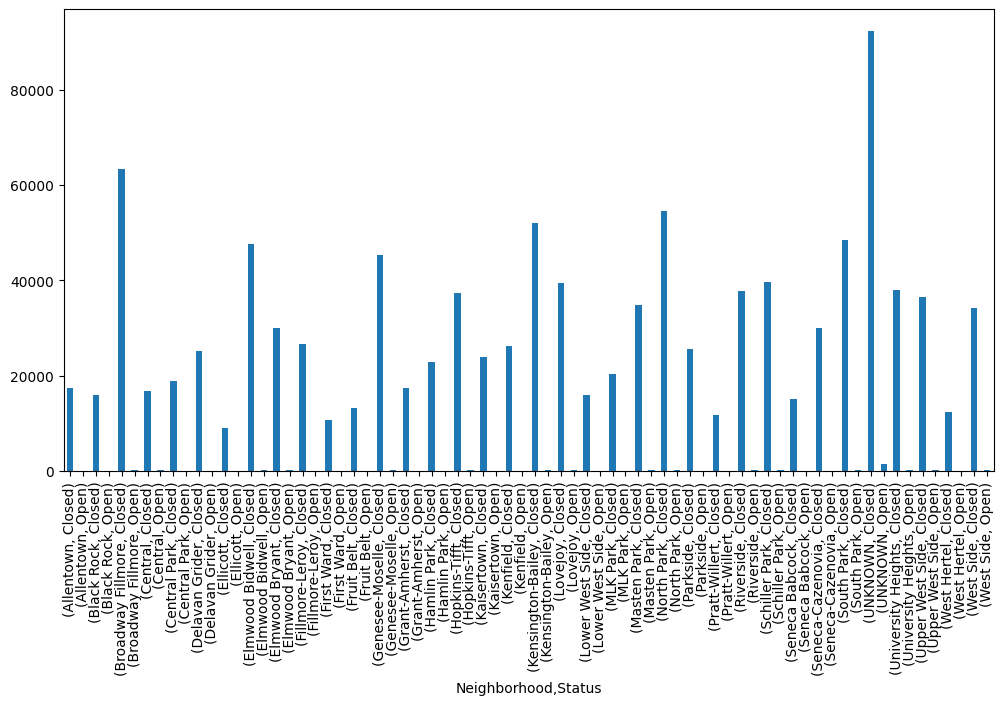

In [73]:
import matplotlib.pyplot as plt

result = buff_dd.groupby(CatVars[7])
counts = result[CatVars[0]].value_counts().compute()

plt.figure(figsize=(12, 6))
ax = counts.plot(kind='bar')
plt.show()

Neighborhood vs Status Plot

The plot by neighborhood and the plot by police district seem normal. However the plot by council district is very odd. There are way to many unknowns given the ratio from unknowns to the other variables.

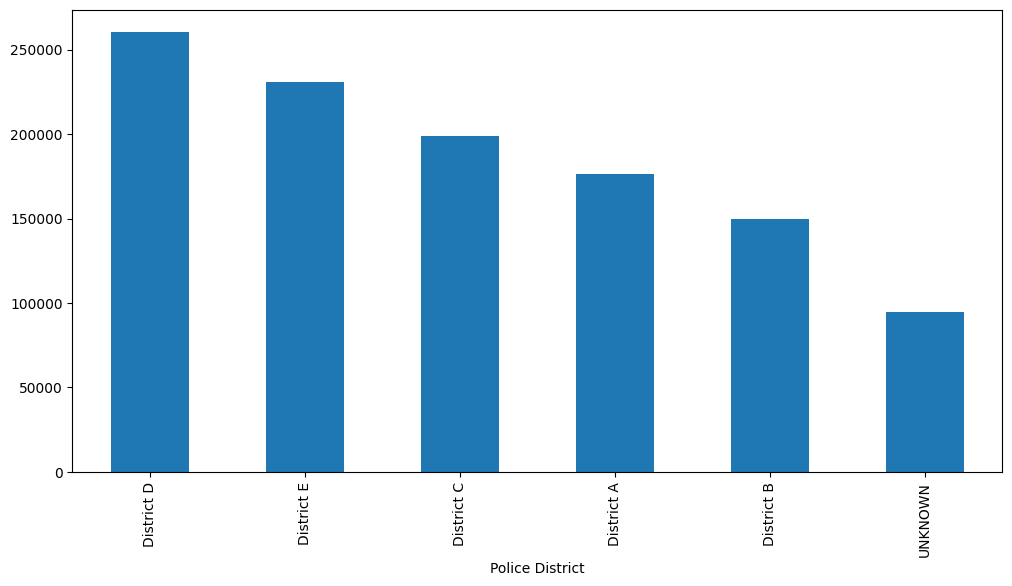

In [91]:
import matplotlib.pyplot as plt

counts = buff_dd[CatVars[6]].value_counts().compute()

plt.figure(figsize=(12, 6))
ax = counts.plot(kind='bar')
ax.set_xlabel('Police District')
plt.show()

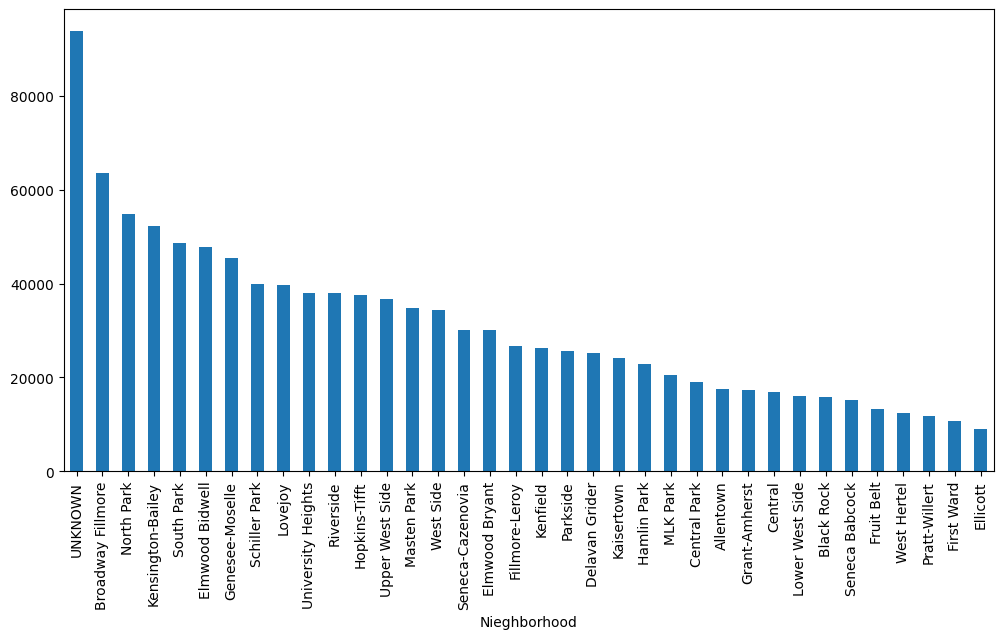

In [92]:
import matplotlib.pyplot as plt

counts = buff_dd[CatVars[7]].value_counts().compute()

plt.figure(figsize=(12, 6))
ax = counts.plot(kind='bar')
ax.set_xlabel('Nieghborhood')
plt.show()

The counts of Neighborhoods and Police District seem ok. Though it is strange that neighborhoods have unknowns at most and Police District have unknowns at least.

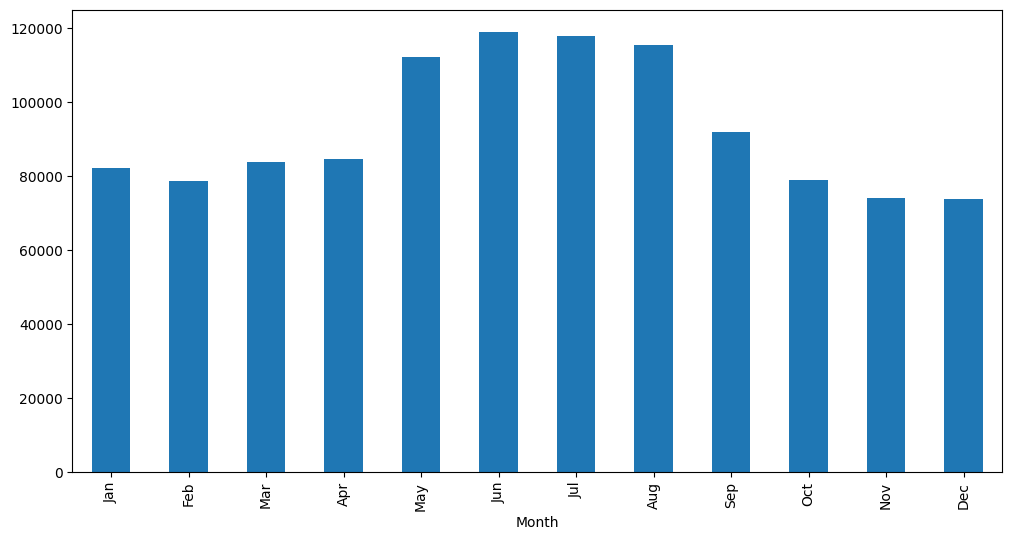

In [93]:
counts = buff_dd[DateVars[0]].dt.month.value_counts().compute()

plt.figure(figsize=(12, 6))
ax = counts.sort_index().plot(kind='bar')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_xlabel('Month')
plt.show()


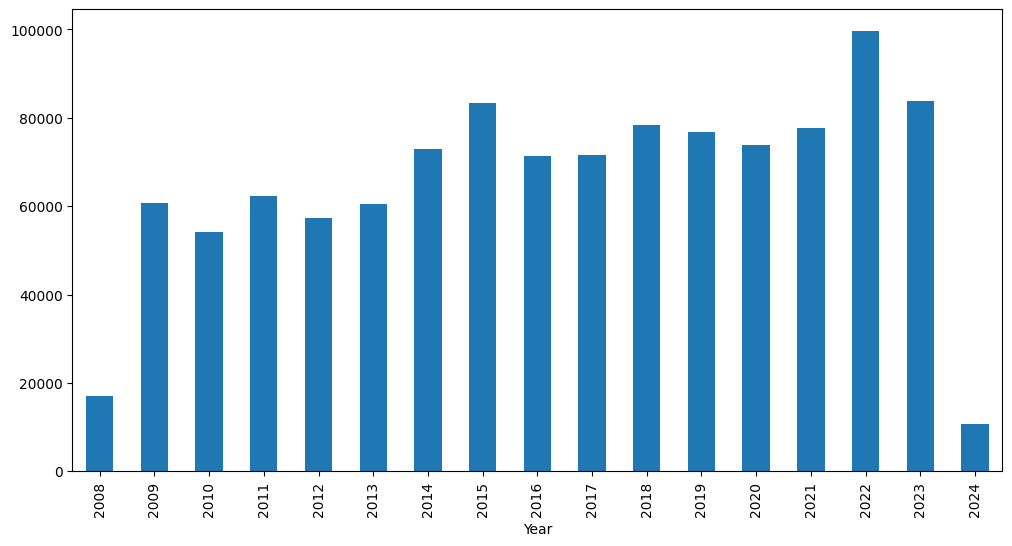

In [94]:
counts = buff_dd[DateVars[0]].dt.year.value_counts().compute()

plt.figure(figsize=(12, 6))
ax = counts.sort_index().plot(kind='bar')
ax.set_xlabel('Year')
plt.show()

The month graph makes sense as the summer months have more entries. However the year graph is very interesting. Obviously 2024 has not finished yet so that data point is kinda irelavent. 2022 and 2015 both have interesting jumps that are not reflected in there adjacent years. And the fall off of 2020 makes sense as well.

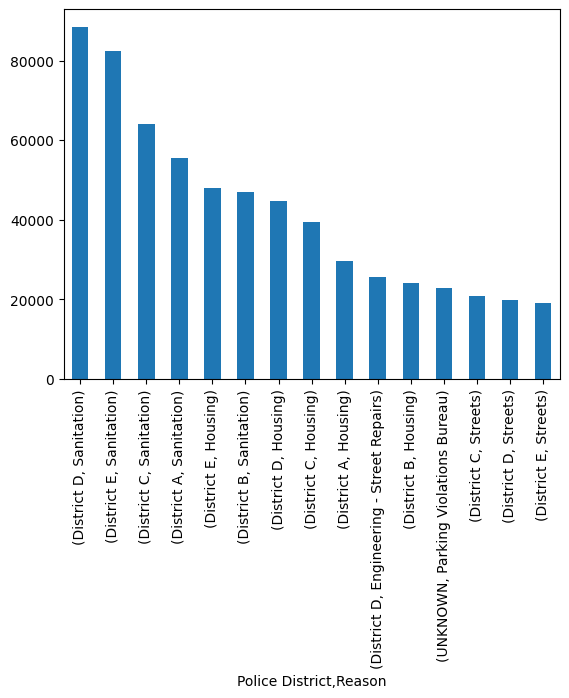

In [95]:
result = buff_dd.groupby(CatVars[6])
counts = result[CatVars[2]].value_counts().compute().nlargest(15)

counts.plot(kind='bar')
plt.show()

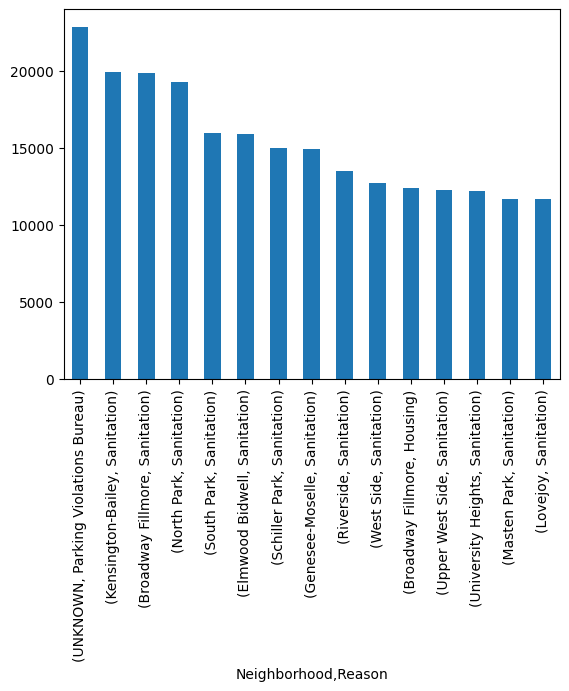

In [96]:
result = buff_dd.groupby(CatVars[7])
counts = result[CatVars[2]].value_counts().compute().nlargest(15)

counts.plot(kind='bar')
plt.show()

Object type sorted by max and Neighborhood and PoliceDistrict. The graphs pretty clearly show that sanitation is a very important call in. However given the low Unknown count of the police district it makes since that these unknown parking violations are not heavily affecting that graph.